In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats
import networkx as nx
import os

In [23]:
import pickle
import pickle
data_dir = 'simulation_results/bridge/'

file_path = data_dir + 'sim_data_bridge_graph_1_trial_1.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)

In [24]:
font = {'family' : 'Helvetica Neue',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

V = data['freq_timeseries'].shape[0]
Q = data['freq_timeseries'].shape[1]

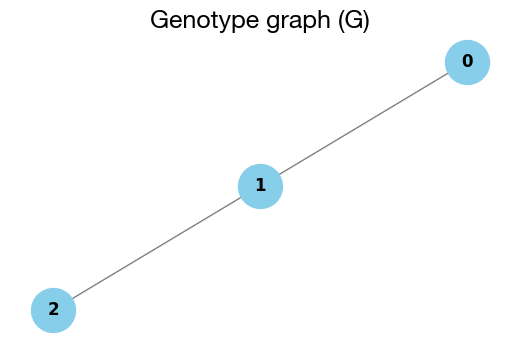

In [25]:
# show the genotype graph 

G = nx.from_numpy_array(data['A'])
node_labels = {i: f'{i}' for i in range(len(data['A']))}

plt.figure(figsize=(5, 3))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')
plt.title('Genotype graph (G)')
plt.show()

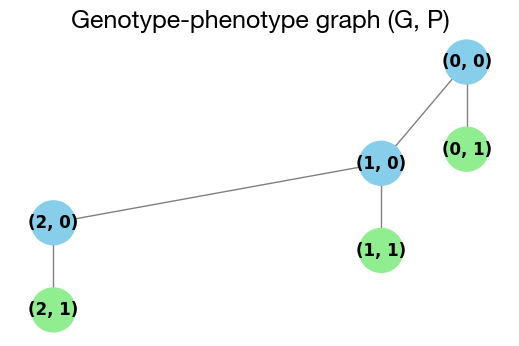

In [26]:
# show the genotype-phenotype graph 

G = nx.from_numpy_array(data['A'])
node_labels = {i: f'({i}, 0)' for i in range(len(data['A']))}

new_nodes = []
new_edges = []

# add phenotype nodes dynamically to each genotype node in the graph
new_node_start_index = len(G.nodes)

for node in G.nodes:
    for i in range(Q-1):  
        new_node = new_node_start_index + node * (Q-1) + i
        new_nodes.append(new_node)  # collect new node
        new_edges.append((node, new_node))  # collect edge between parent and child

G.add_nodes_from(new_nodes)  
G.add_edges_from(new_edges)  

# labels for phenotype nodes
for child_node in new_nodes:
    genotype_parent = child_node % len(new_nodes)
    child_number = child_node % (Q-1) + 1
    node_labels[child_node] = '(' + str(genotype_parent) + ', ' + str(child_number) + ')'

# colors 
node_colors = []
for node in G.nodes:
    if node < len(data['A']):  
        node_colors.append('skyblue')
    else:  
        node_colors.append('lightgreen')

# positioning the nodes
pos = nx.spring_layout(G, seed=42)

# offset the children below their parent nodes
child_pos_offset = 0.50 
for node in range(len(data['A'])):
    children = [n for n in G.neighbors(node)]  
    child_count = 0
    for child in children:
        if child >= len(data['A']): 
            pos[child] = (pos[node][0], pos[node][1] - child_pos_offset * (child_count + 1))
            child_count += 1

plt.figure(figsize=(5, 3))
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, node_color=node_colors, font_size=12, font_weight='bold', edge_color='gray')

plt.title("Genotype-phenotype graph (G, P)")
plt.show()

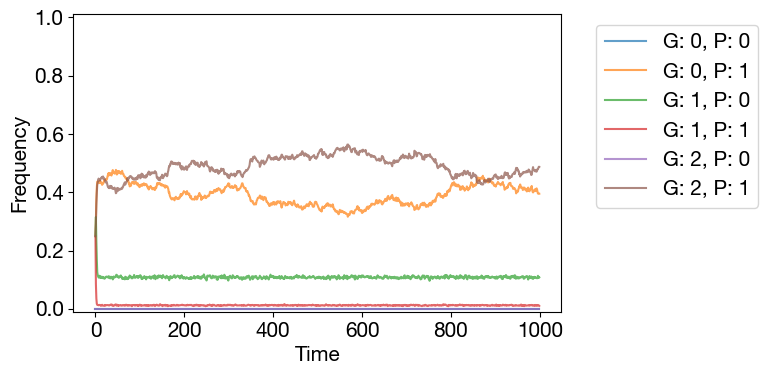

In [27]:
plt.figure(figsize=(8, 4))

# loop through each (genotype, phenotype) pair
for i in range(V):  # genotypes 
    for j in range(Q):  # phenotypes 
        plt.plot(data['freq_timeseries'][i, j, :], label=f'G: {i}, P: {j}', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(-0.01,1.01)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

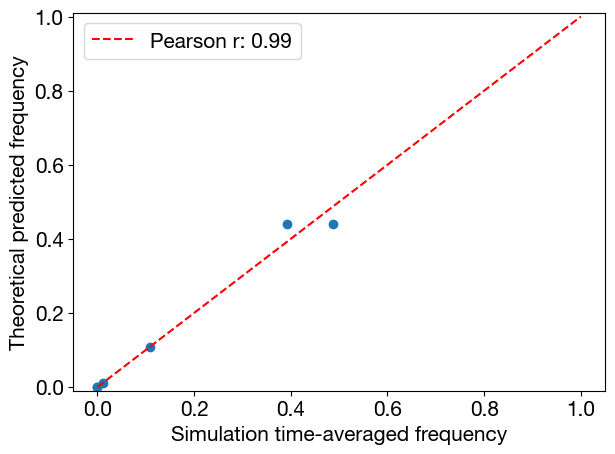

In [28]:
import scipy.stats


time_average = np.mean(data['freq_timeseries'], axis=2).flatten()
theory = data['f_eq']

plt.plot(time_average, theory, 'o')

# compute Pearson correlation
correlation, _ = scipy.stats.pearsonr(time_average, theory)

# plot the line
x = np.linspace(0, 1, 100)
y = x
plt.plot(x, y, color='red', linestyle='--', label=f'Pearson r: {correlation:.2f}')
# ax.set_yscale('log')
# ax.set_xscale('log')
# ax.axvline(1/1000, color='gray', linestyle='--')
# ax.axvline(1/np.sqrt(1000), color='green', linestyle='--')
plt.xlabel('Simulation time-averaged frequency')
plt.ylabel('Theoretical predicted frequency')
plt.ylim(-0.01, 1.01)
# plt.text(0.05, 0.9, f'Pearson r: {correlation:.2f}')
plt.legend()
plt.tight_layout()
plt.show()